In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import joblib

In [3]:
# Load the dataset
df = pd.read_csv("../data/urlData.csv")
df.dropna(inplace=True)

# Drop non-numeric column
X = df.drop(['Label', 'Domain'], axis=1)
y = df['Label']

In [4]:
# Split before scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

Accuracy: 0.9609707280460346
F1 Score: 0.9596064215432418

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1988
           1       1.00      0.92      0.96      2009

    accuracy                           0.96      3997
   macro avg       0.96      0.96      0.96      3997
weighted avg       0.96      0.96      0.96      3997



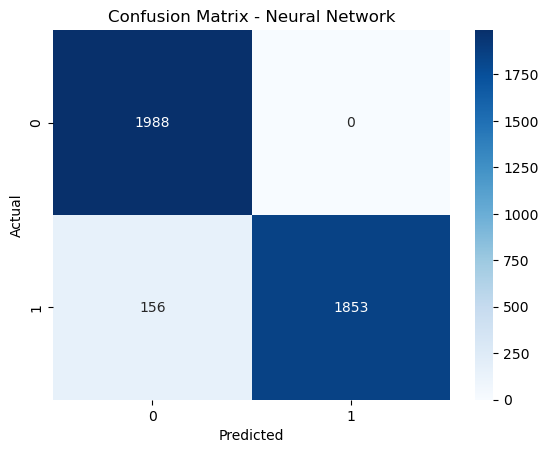

In [6]:
# Predict
y_pred = mlp.predict(X_test_scaled)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Save the model and scaler
joblib.dump(mlp, "../model/neural_network_model.pkl")
joblib.dump(scaler, "../model/scaler.pkl")
print("✅ Model and scaler saved")

✅ Model and scaler saved
